# Plane Delays #

I have flight benefits. Because of the flight benefits, I travel a lot. However, when using it, my flight benefits force me to be flexible all the time when travelling. One factor that I can be at risk of at many times is flight delay, especially if I have to do a connecting flight shortly after another flight. 

Problem:
What factors are more likely to cause a flight delay?

Data Source: Kaggle Flight Delays Challenge hosted by OpenDataScience.
https://www.kaggle.com/competitions/flight-delays-spring-2018/data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = "flight_delays_train.csv"
n = sum(1 for line in open(filename)) - 1 
s = 66666
skip = sorted(random.sample(range(1,n+1),n-s))
df = pd.read_csv(filename, skiprows=skip)

df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
1,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
2,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
3,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
4,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N


Viewing ramdom sample of file. Will be using 2/3 of dataset because RAM maxes out when using full.

## Cleaning ##

In [3]:
filename = "flight_delays_train.csv"
n = sum(1 for line in open(filename)) - 1 
s = 20000
skip = sorted(random.sample(range(1,n+1),n-s))
df = pd.read_csv(filename, skiprows=skip)
#Sampling reused so all cleaning code can run at once

array = ['Month', 'DayofMonth', 'DayOfWeek']
for z in array:
    column = df[z]
    for x,y in enumerate(column):
        column[x] = int(y[2:])

deptime = df['DepTime']
for x,y in enumerate(deptime):
    deptime[x] = math.floor((y/100))
    
delay = df['dep_delayed_15min']
for x,y in enumerate(delay):
    if y == 'N':
        delay[x] = 0
    if y == 'Y':
        delay[x] = 1

df = df[df['DepTime'] < 24]
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,11,25,6,10,OO,DEN,MEM,872,0
1,5,21,6,17,DL,BDL,CVG,661,0
2,3,5,7,12,WN,PHX,STL,1262,0
3,9,20,2,16,MQ,DSM,ORD,299,0
4,12,31,6,18,DL,ATL,MSP,906,0


Converting c- columns to fully numeric values. Reducing Departure time to time blocs.

## Filtering Out Smaller Airports ##

Most of the airports in the list are airports I'll never even recognize their existence of. I'll filter it out to only the top 50 airports; larger airports tend to have more layover capabilities and the largest have mostly layover passengers, and present more options for me. Small airports have wild statistical tendencies.

In [4]:
origins = df['Origin'].value_counts()
origins = origins.to_frame()

In [5]:
toporigins = origins.index[:50]
toporigins = toporigins.array
toporigins

<PandasArray>
['ATL', 'ORD', 'DFW', 'LAX', 'IAH', 'DEN', 'PHX', 'LAS', 'CVG', 'EWR', 'SLC',
 'MSP', 'SFO', 'BOS', 'DTW', 'MCO', 'LGA', 'PHL', 'CLT', 'JFK', 'DCA', 'IAD',
 'SEA', 'BWI', 'SAN', 'CLE', 'MDW', 'TPA', 'STL', 'OAK', 'FLL', 'RDU', 'MIA',
 'HNL', 'BNA', 'MCI', 'SJC', 'PDX', 'HOU', 'MEM', 'PIT', 'SMF', 'SNA', 'IND',
 'AUS', 'DAL', 'SAT', 'MSY', 'CMH', 'ONT']
Length: 50, dtype: object

In [6]:
df = df[df['Origin'].isin(toporigins)]
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,11,25,6,10,OO,DEN,MEM,872,0
2,3,5,7,12,WN,PHX,STL,1262,0
4,12,31,6,18,DL,ATL,MSP,906,0
5,4,18,1,6,AA,ORD,LAX,1745,0
6,12,3,7,16,EV,ATL,MYR,317,1


In [7]:
origins = df['Origin'].value_counts()
origins = origins.to_frame()

nums = []
for x,y in enumerate(origins['Origin']):
    nums.append(origins['Origin'][x])

## General Factors ##

### Weekly Factors ###

<AxesSubplot:xlabel='DayOfWeek', ylabel='Count'>

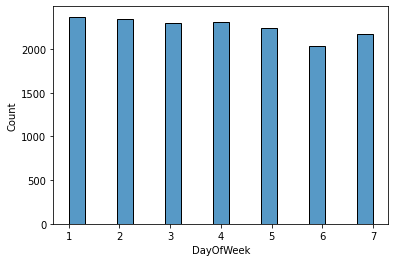

In [8]:
sns.histplot(x = df["DayOfWeek"])

Day of week of flight also largely consistent. Saturday however faces a dip. Likely due to people travelling on Fridays and Sundays for weekend travel.

<AxesSubplot:xlabel='DayOfWeek', ylabel='dep_delayed_15min'>

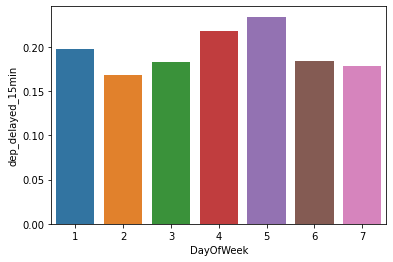

In [9]:
sns.barplot(x = df["DayOfWeek"], y = df["dep_delayed_15min"], ci = None)

Differences more stark in delay rate by weekday, with a high of typically above 20 percent on Fridays and a low of about just above 15 percent on Tuesdays. Likely due to passenger complications, mainly waiting for connecting passengers.

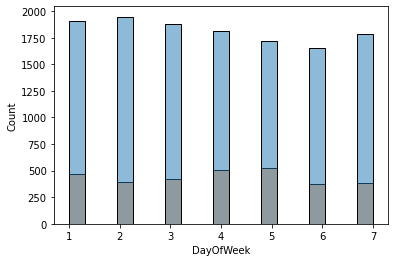

In [10]:
sns.histplot(x = df['DayOfWeek'], hue = df['dep_delayed_15min'])
plt.legend([],[], frameon=False)
#Bottom Color is delayed

### Monthly Factors ###

<AxesSubplot:xlabel='Month', ylabel='Count'>

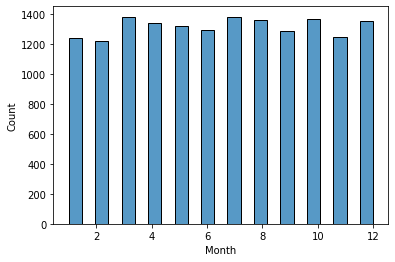

In [11]:
sns.histplot(x = df["Month"])

Airline flight count largely consistent throughout the months. Remember some months are longer than others.

<AxesSubplot:xlabel='Month', ylabel='dep_delayed_15min'>

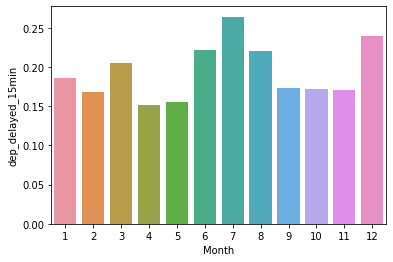

In [12]:
sns.barplot(x = df["Month"], y = df["dep_delayed_15min"], ci = None)

Differences more stark in delay rate by month, with above of roughtly 20 percent in vacation months and low of around 15 percent in the non vactation months. Reason for difference is likely the same as for the weekdays; airlines are waiting more often on connecting passengers.

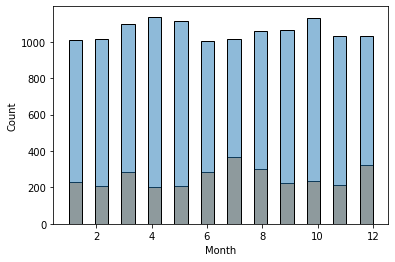

In [13]:
sns.histplot(x = df['Month'], hue = df['dep_delayed_15min'])
plt.legend([],[], frameon=False)
#Bottom Color is delayed

Visualization of share of delays by month.

Visualization of share of delays by month.

### Distance & Time of Day Factors ###

<AxesSubplot:xlabel='dep_delayed_15min', ylabel='Distance'>

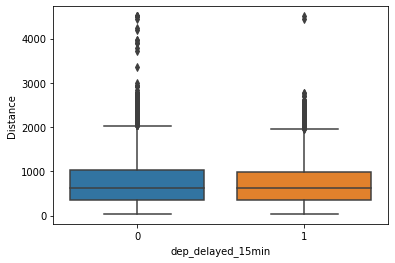

In [14]:
sns.boxplot(x = df["dep_delayed_15min"], y = df["Distance"])

Distance between destinations largely does not affect flight delay.

<AxesSubplot:xlabel='DepTime', ylabel='dep_delayed_15min'>

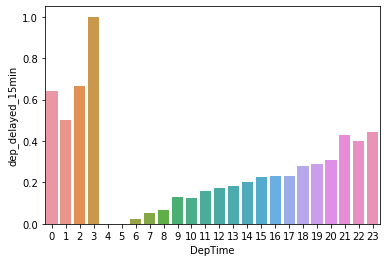

In [15]:
sns.barplot(x = df["DepTime"], y = df["dep_delayed_15min"], ci = None)

Flight delays create cascading effect throughout the day, with a max rate of  40 percent by midnight. Departure times from 0-4 AM extremely sparse, Would give little regard of that specific time period.

## Airport Factors ##

In [16]:
rates = []
for x in toporigins:
    subset =  df[df['Origin'] == x]
    rate = np.mean(subset["dep_delayed_15min"])
    rates.append(rate)

In [30]:
delratedf = pd.DataFrame()

delratedf['airport'] = toporigins
delratedf['delrate'] = rates
delratedf['count'] = nums

delratedf = delratedf.sort_values('delrate', ascending = False)
delratedf.head(10)

,airport,delrate,count
1,ORD,0.265144,1007
26,MDW,0.264000,250
32,MIA,0.248619,181
0,ATL,0.248531,1191
9,EWR,0.242152,446
19,JFK,0.236246,309
38,HOU,0.234899,149
22,SEA,0.229091,275
41,SMF,0.229008,131
14,DTW,0.222812,377


In [38]:
delratedf.tail()

,airport,delrate,count
10,SLC,0.127226,393
46,SAT,0.119658,117
36,SJC,0.108280,157
49,ONT,0.105263,95
33,HNL,0.072626,179


Chicago area(ORD & MDW) tend to be among the most delayed airports. Chicago is known to have bad weather. 

ORD and MDW are both the most important hubs for their own airlines & form of travel.

Atlanta is also consistently among the most delayed, is the busiest airport in the world.

Honlulu(HNL) is consistently the least delayed airport.

<AxesSubplot:xlabel='delrate', ylabel='Count'>

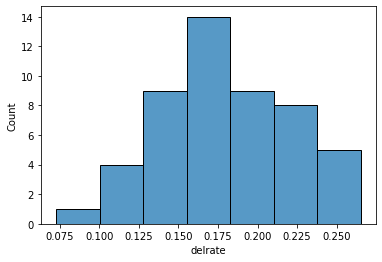

In [18]:
sns.histplot(x = delratedf["delrate"])

Delay rate usually around 15%-20%

<AxesSubplot:xlabel='count', ylabel='delrate'>

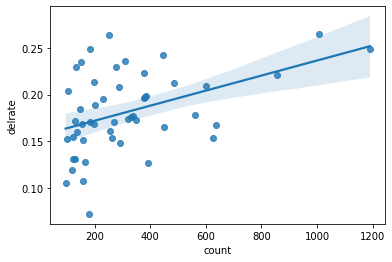

In [19]:
sns.regplot(x = delratedf['count'], y = delratedf['delrate'])

In [20]:
r = np.corrcoef(delratedf['count'], delratedf['delrate'])
r[1,0]

0.43392771619604703

Correlation above .3 most of the time and around .2 at it's lowest, indication there is a slight correlation between . About ines up with airports being connecting hub in combination with connecting passengers causing delay.

## Airline Factors##

<AxesSubplot:xlabel='UniqueCarrier', ylabel='dep_delayed_15min'>

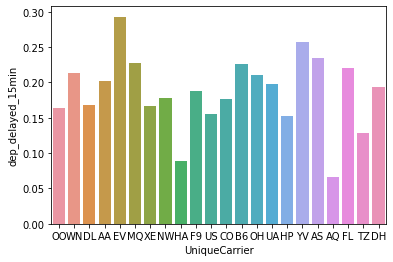

In [21]:
sns.barplot(x = df["UniqueCarrier"], y = df["dep_delayed_15min"], ci = None)

Lowest delay rate tends to be Hawaiian Airlines(HA). Other low delay flight was Aloha(AQ), another Hawaiian carrier, but it no longer exists. Coincides with the fact that Honolulu has lowest delay rate.

Most of the most delayed airlines are either codesharing regional airlines(YV & EV) or don't exist anymore(FL). The relevant airlines with the most delays are Alaskan(AS), & Southwest(WN).

## Analyzing Midway & Atlanta ##

Midway and Atlanta are my most vital airports when I travel, for they are about always the hubs I lay over at, and in combination with their high delay rates, make them airports worth looking deeper into.

### Midway ###

In [22]:
midway = df[df['Origin'] == 'MDW']
midway.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
42,9,26,1,20,NW,MDW,MSP,349,1
167,3,16,3,16,WN,MDW,SDF,271,0
207,11,26,6,17,WN,MDW,ALB,717,0
278,8,4,4,11,WN,MDW,DTW,229,1
303,9,24,6,9,WN,MDW,SAN,1728,0


<AxesSubplot:xlabel='DayOfWeek', ylabel='dep_delayed_15min'>

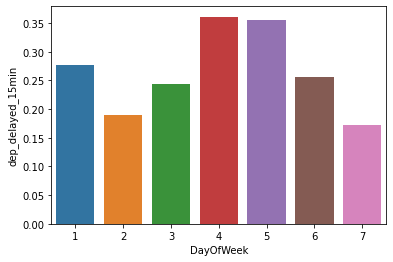

In [23]:
sns.barplot(x = midway["DayOfWeek"], y = midway["dep_delayed_15min"], ci = None)

Delay rates tends to be around or above 20 percent most days of the week. highest delay rates of week are usually Fridays at above 30 percent and under 20 percent Tuesdays.

<AxesSubplot:xlabel='Month', ylabel='dep_delayed_15min'>

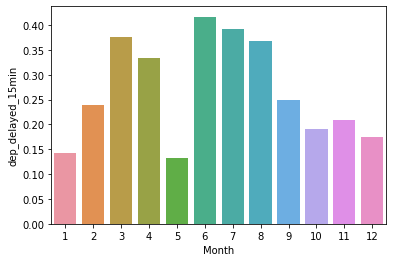

In [24]:
sns.barplot(x = midway["Month"], y = midway["dep_delayed_15min"], ci = None)

Delay rates at or above 30 percent in warm travel months.

<AxesSubplot:xlabel='DepTime', ylabel='dep_delayed_15min'>

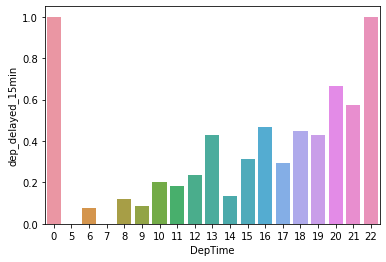

In [25]:
sns.barplot(x = midway["DepTime"], y = midway["dep_delayed_15min"], ci = None)

Delay rate usually at or above 40 percent in evening. Even around midday it reaches 40 percent.

### Atlanta ###

In [26]:
atlanta = df[df['Origin'] == 'ATL']
atlanta.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
4,12,31,6,18,DL,ATL,MSP,906,0
6,12,3,7,16,EV,ATL,MYR,317,1
12,1,18,3,18,DL,ATL,MEM,332,0
23,10,24,2,15,DL,ATL,SAN,1891,0
41,7,31,1,16,AA,ATL,MIA,595,0


<AxesSubplot:xlabel='DayOfWeek', ylabel='dep_delayed_15min'>

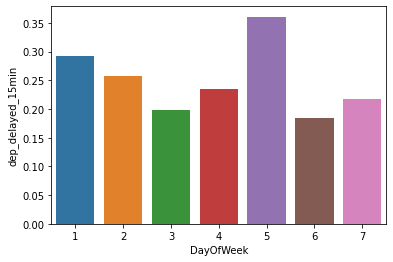

In [27]:
sns.barplot(x = atlanta["DayOfWeek"], y = atlanta["dep_delayed_15min"], ci = None)

Mondays and Fridays typically in 30s. Low is usually on saturday at around 20 percent.

<AxesSubplot:xlabel='Month', ylabel='dep_delayed_15min'>

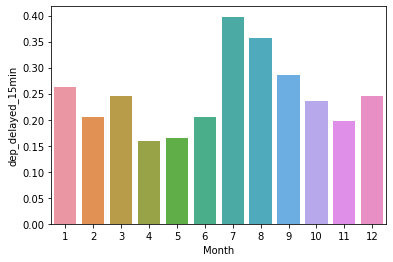

In [28]:
sns.barplot(x = atlanta["Month"], y = atlanta["dep_delayed_15min"], ci = None)

Delray rates at or above 30 percent in summer months. Slower months around 15 - 25 percent.

<AxesSubplot:xlabel='DepTime', ylabel='dep_delayed_15min'>

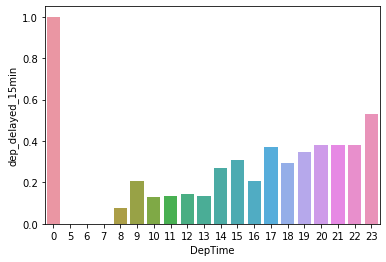

In [29]:
sns.barplot(x = atlanta["DepTime"], y = atlanta["dep_delayed_15min"], ci = None)

Delay rates especially bad in evening, when they start touching 40 percent for some hours.

## Conclusion ##

It appears the risk of flight delay is greatest during the months of high travel activity; the summer months, December, and March. Another significant factor is that my risk of delays increases quite substantially throughout the course of the day. Flight delays seem to appear them most on Fridays and the least on Saturdays. There is a slight relationship in airport sizes, but more importantly there are consistent names in the most delayed airports, most relevantly for me Atlanta and the Chicago airports.

It appears the largest variable that isn't directly listed on this dataset is the amount of connecting passengers, as can be seen with the delay rates at hubs and larger airports and during times that are known the have more travellers.

With those results, I should be able to more effectively predict if I will be missing a flight or not; I can know when and where I should consider adding more time padding between my flights.